# Movie Predictions and Recommendations

### Data Collection

In [353]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [354]:
# importing all required datafrom different files. 
# u.data -> ratings
# u.item -> movie details
# u.user -> user details
ratings = pd.read_csv("ml-100k/u.data", sep ='\t', names =["user_id", "item_id", "ratings", "timestamp"])
movies = pd.read_csv("ml-100k/u.item", sep='|', encoding='latin-1', header=None,
                     names=["item_id", "title", "release_date", "video_release_date", "IMDb_URL",
                            "unknown", "Action", "Adventure", "Animation", "Children's", "Comedy",
                            "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror",
                            "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"])

users = pd.read_csv("ml-100k/u.user", sep='|', names = ["user_id", "age", "gender", "occupation", "zipcode"])

In [355]:
# merging all the data into one dataframe
data = pd.merge(ratings, movies, on="item_id")
data = pd.merge(data, users, on ="user_id")


In [356]:
data.head()

,user_id,item_id,ratings,timestamp,title,release_date,video_release_date,IMDb_URL,unknown,Action,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,age,gender,occupation,zipcode
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,49,M,writer,55105
1,186,302,3,891717742,L.A. Confidential (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,0,0,...,1,0,0,1,0,0,39,F,executive,00000
2,22,377,1,878887116,Heavyweights (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Heavyweights%...,0,0,...,0,0,0,0,0,0,25,M,writer,40206
3,244,51,2,880606923,Legends of the Fall (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Legends%20of%...,0,0,...,0,1,0,0,1,1,28,M,technician,80525
4,166,346,1,886397596,Jackie Brown (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-11...,0,0,...,0,0,0,0,0,0,47,M,educator,55113


### Data Cleaning

In [357]:
#dropping unnecessary columns
data.drop(columns=['timestamp', 'zip_code', 'IMDb_URL', 'video_release_date'], inplace=True, errors='ignore')
data.drop(columns=['unknown'])

,user_id,item_id,ratings,title,release_date,Action,Adventure,Animation,Children's,Comedy,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,age,gender,occupation,zipcode
0,196,242,3,Kolya (1996),24-Jan-1997,0,0,0,0,1,...,0,0,0,0,0,0,49,M,writer,55105
1,186,302,3,L.A. Confidential (1997),01-Jan-1997,0,0,0,0,0,...,1,0,0,1,0,0,39,F,executive,00000
2,22,377,1,Heavyweights (1994),01-Jan-1994,0,0,0,1,1,...,0,0,0,0,0,0,25,M,writer,40206
3,244,51,2,Legends of the Fall (1994),01-Jan-1994,0,0,0,0,0,...,0,1,0,0,1,1,28,M,technician,80525
4,166,346,1,Jackie Brown (1997),01-Jan-1997,0,0,0,0,0,...,0,0,0,0,0,0,47,M,educator,55113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,880,476,3,"First Wives Club, The (1996)",14-Sep-1996,0,0,0,0,1,...,0,0,0,0,0,0,13,M,student,83702
99996,716,204,5,Back to the Future (1985),01-Jan-1985,0,0,0,0,1,...,0,0,1,0,0,0,36,F,administrator,44265
99997,276,1090,1,Sliver (1993),01-Jan-1993,0,0,0,0,0,...,0,0,0,1,0,0,21,M,student,95064
99998,13,225,2,101 Dalmatians (1996),27-Nov-1996,0,0,0,1,1,...,0,0,0,0,0,0,47,M,educator,29206


In [358]:
# standardizing data types
data.dtypes


user_id          int64
item_id          int64
ratings          int64
title           object
release_date    object
unknown          int64
Action           int64
Adventure        int64
Animation        int64
Children's       int64
Comedy           int64
Crime            int64
Documentary      int64
Drama            int64
Fantasy          int64
Film-Noir        int64
Horror           int64
Musical          int64
Mystery          int64
Romance          int64
Sci-Fi           int64
Thriller         int64
War              int64
Western          int64
age              int64
gender          object
occupation      object
zipcode         object
dtype: object

In [359]:
data['ratings'] = data['ratings'].astype(float)

In [360]:
data.dtypes

user_id           int64
item_id           int64
ratings         float64
title            object
release_date     object
unknown           int64
Action            int64
Adventure         int64
Animation         int64
Children's        int64
Comedy            int64
Crime             int64
Documentary       int64
Drama             int64
Fantasy           int64
Film-Noir         int64
Horror            int64
Musical           int64
Mystery           int64
Romance           int64
Sci-Fi            int64
Thriller          int64
War               int64
Western           int64
age               int64
gender           object
occupation       object
zipcode          object
dtype: object

In [361]:
data.duplicated().sum()

np.int64(0)

In [362]:
# One hot coding gender and occupation
data = pd.get_dummies(data, columns=['gender', 'occupation'], drop_first = True)

In [363]:
#Scaling age
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['age']] = scaler.fit_transform(data[['age']])

In [364]:
data.head()

,user_id,item_id,ratings,title,release_date,unknown,Action,Adventure,Animation,Children's,...,occupation_marketing,occupation_none,occupation_other,occupation_programmer,occupation_retired,occupation_salesman,occupation_scientist,occupation_student,occupation_technician,occupation_writer
0,196,242,3.0,Kolya (1996),24-Jan-1997,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
1,186,302,3.0,L.A. Confidential (1997),01-Jan-1997,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,22,377,1.0,Heavyweights (1994),01-Jan-1994,0,0,0,0,1,...,False,False,False,False,False,False,False,False,False,True
3,244,51,2.0,Legends of the Fall (1994),01-Jan-1994,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
4,166,346,1.0,Jackie Brown (1997),01-Jan-1997,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [365]:
data.describe()

,user_id,item_id,ratings,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,age
count,100000.00000,100000.000000,100000.000000,100000.0000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,0.0001,0.255890,0.137530,0.036050,0.071820,0.298320,0.080550,...,0.017330,0.053170,0.049540,0.052450,0.194610,0.12730,0.21872,0.093980,0.018540,-8.874679e-17
std,266.61442,330.798356,1.125674,0.0100,0.436362,0.344408,0.186416,0.258191,0.457523,0.272144,...,0.130498,0.224373,0.216994,0.222934,0.395902,0.33331,0.41338,0.291802,0.134894,1.000005e+00
min,1.00000,1.000000,1.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,-2.246028e+00
25%,254.00000,175.000000,3.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,-7.757664e-01
50%,447.00000,322.000000,4.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,-2.568504e-01
75%,682.00000,631.000000,4.000000,0.0000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,6.080095e-01
max,943.00000,1682.000000,5.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,3.462047e+00


In [366]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   user_id                   100000 non-null  int64  
 1   item_id                   100000 non-null  int64  
 2   ratings                   100000 non-null  float64
 3   title                     100000 non-null  object 
 4   release_date              99991 non-null   object 
 5   unknown                   100000 non-null  int64  
 6   Action                    100000 non-null  int64  
 7   Adventure                 100000 non-null  int64  
 8   Animation                 100000 non-null  int64  
 9   Children's                100000 non-null  int64  
 10  Comedy                    100000 non-null  int64  
 11  Crime                     100000 non-null  int64  
 12  Documentary               100000 non-null  int64  
 13  Drama                     100000 non-null  in

### Data Analysis

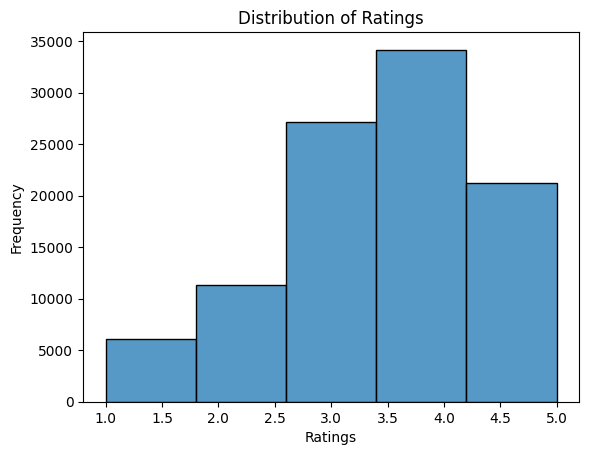

In [367]:
#how users rate movies
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data['ratings'], bins=5)
plt.title("Distribution of Ratings")
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.show()

In [368]:
# top rated movies
top_rated = data['title'].value_counts().head(10)
print("Top 10 Most Rated Movies:\n", top_rated)

Top 10 Most Rated Movies:
 title
Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: count, dtype: int64


In [369]:
#average rating per movie
movie_stats = data.groupby('title')['ratings'].agg(['mean', 'count'])
popular_movies = movie_stats[movie_stats['count'] > 100].sort_values('mean', ascending=False)
print(popular_movies.head(10))


                                      mean  count
title                                            
Close Shave, A (1995)             4.491071    112
Schindler's List (1993)           4.466443    298
Wrong Trousers, The (1993)        4.466102    118
Casablanca (1942)                 4.456790    243
Shawshank Redemption, The (1994)  4.445230    283
Rear Window (1954)                4.387560    209
Usual Suspects, The (1995)        4.385768    267
Star Wars (1977)                  4.358491    583
12 Angry Men (1957)               4.344000    125
Citizen Kane (1941)               4.292929    198


In [370]:
# demographic analysis
# Average rating by age
age_ratings = data.groupby('age')['ratings'].mean()
print("Average Ratings by Age:\n", age_ratings)


Average Ratings by Age:
 age
-2.246028    3.767442
-1.986570    3.387097
-1.900084    2.925926
-1.727112    3.470825
-1.640626    3.375000
               ...   
 2.856645    3.189189
 3.029617    3.500000
 3.116103    3.660256
 3.202589    3.517730
 3.462047    3.982143
Name: ratings, Length: 61, dtype: float64


In [371]:
print([col for col in data.columns if 'gender' in col or 'occupation' in col])

['gender_M', 'occupation_artist', 'occupation_doctor', 'occupation_educator', 'occupation_engineer', 'occupation_entertainment', 'occupation_executive', 'occupation_healthcare', 'occupation_homemaker', 'occupation_lawyer', 'occupation_librarian', 'occupation_marketing', 'occupation_none', 'occupation_other', 'occupation_programmer', 'occupation_retired', 'occupation_salesman', 'occupation_scientist', 'occupation_student', 'occupation_technician', 'occupation_writer']


In [372]:
# demographic analysis
# Average rating by gender (one hot encoded)
gender_grouped = data.groupby('gender_M')['ratings'].mean()
gender_grouped.index = ['F', 'M']  # 0 = F, 1 = M
print(gender_grouped)

F    3.531507
M    3.529289
Name: ratings, dtype: float64


In [373]:
# demographic analysis
# Average rating by occupation (one hot encoded)
occupation_cols = [col for col in data.columns if col.startswith('occupation_')]

# Create a dict to hold avg ratings by each occupation
occupation_avg_ratings = {}

for col in occupation_cols:
    # Use boolean mask to filter rows where this occupation = 1
    avg_rating = data.loc[data[col] == 1, 'ratings'].mean()
    occupation_avg_ratings[col.replace('occupation_', '')] = avg_rating

# Sort and display
import pandas as pd
occupation_ratings_df = pd.DataFrame.from_dict(occupation_avg_ratings, orient='index', columns=['avg_rating'])
occupation_ratings_df.sort_values('avg_rating', ascending=False)

,avg_rating
none,3.779134
lawyer,3.735316
doctor,3.688889
educator,3.670621
artist,3.653380
scientist,3.611273
salesman,3.582944
programmer,3.568260
librarian,3.560781
other,3.552377


In [374]:
# pivot tabel with rows -> users, columns -> movies, and values -> ratings
user_item_matrix = data.pivot_table(index='user_id', columns='title', values='ratings')
print(user_item_matrix.head())

title    'Til There Was You (1997)  1-900 (1994)  101 Dalmatians (1996)  \
user_id                                                                   
1                              NaN           NaN                    2.0   
2                              NaN           NaN                    NaN   
3                              NaN           NaN                    NaN   
4                              NaN           NaN                    NaN   
5                              NaN           NaN                    2.0   

title    12 Angry Men (1957)  187 (1997)  2 Days in the Valley (1996)  \
user_id                                                                 
1                        5.0         NaN                          NaN   
2                        NaN         NaN                          NaN   
3                        NaN         2.0                          NaN   
4                        NaN         NaN                          NaN   
5                        NaN        

In [375]:
# computing similarity between movies to recommend similar ones
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Fill missing values with zeros (or use another imputation strategy)
movie_matrix = user_item_matrix.fillna(0)

# Compute cosine similarity between movies
similarity_matrix = cosine_similarity(movie_matrix.T)
# Convert to DataFrame for easy lookup, using movie titles as index and columns
similarity_df = pd.DataFrame(similarity_matrix, index=movie_matrix.columns, columns=movie_matrix.columns)

# For a given movie, get the most similar movies
target_movie = "Star Wars (1977)"
similar_movies = similarity_df[target_movie].sort_values(ascending=False)
print(similar_movies.head(10))


title
Star Wars (1977)                             1.000000
Return of the Jedi (1983)                    0.884476
Raiders of the Lost Ark (1981)               0.764885
Empire Strikes Back, The (1980)              0.749819
Toy Story (1995)                             0.734572
Godfather, The (1972)                        0.697332
Independence Day (ID4) (1996)                0.692837
Indiana Jones and the Last Crusade (1989)    0.689343
Fargo (1996)                                 0.686533
Silence of the Lambs, The (1991)             0.676428
Name: Star Wars (1977), dtype: float64


In [376]:
#comparing user similarity to recommend to users the highest rated movies of other similar users.
# Compute user similarity
user_similarity = cosine_similarity(user_item_matrix.fillna(0))
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

# Example: Find users similar to a given user (say, user_id = 1)
target_user = 1
similar_users = user_similarity_df[target_user].sort_values(ascending=False)
print(similar_users.head(10))


user_id
1      1.000000
916    0.566293
864    0.549277
457    0.541364
92     0.539415
268    0.538883
435    0.535961
738    0.528695
429    0.527610
303    0.523387
Name: 1, dtype: float64


### Predictive Models and Data Visualizations

In [377]:
# Linear Regression (predicting ratings)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

features = data[[ 'gender_M', 'occupation_engineer', 'Action', 'Drama']]  # etc.
target = data['ratings']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)


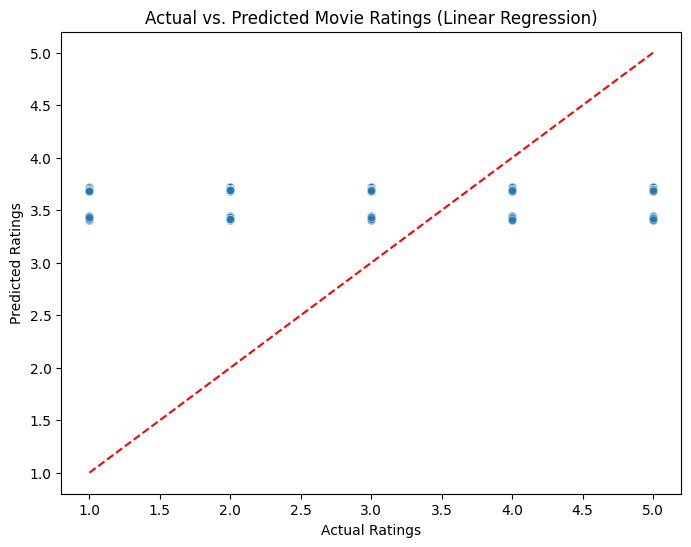

In [378]:
# Scatter plot for actual vs. predicted ratings (Linear Regression)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=preds, alpha=0.4)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs. Predicted Movie Ratings (Linear Regression)")
plt.plot([1, 5], [1, 5], '--', color='red')  # 1–5 scale reference
plt.show()


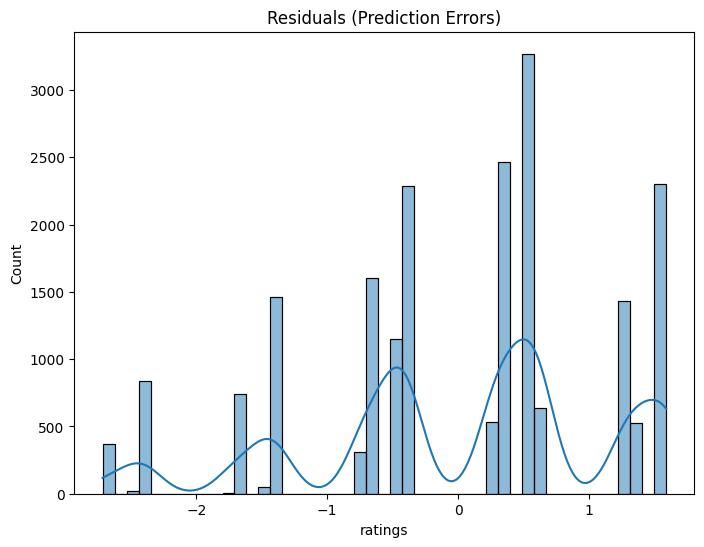

In [379]:
# Residual visualization to check for overfitting or underfitting
residuals = y_test - preds
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True)
plt.title("Residuals (Prediction Errors)")
plt.show()


In [380]:
# Ridge regression

from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)
predictions = model.predict(X_test)


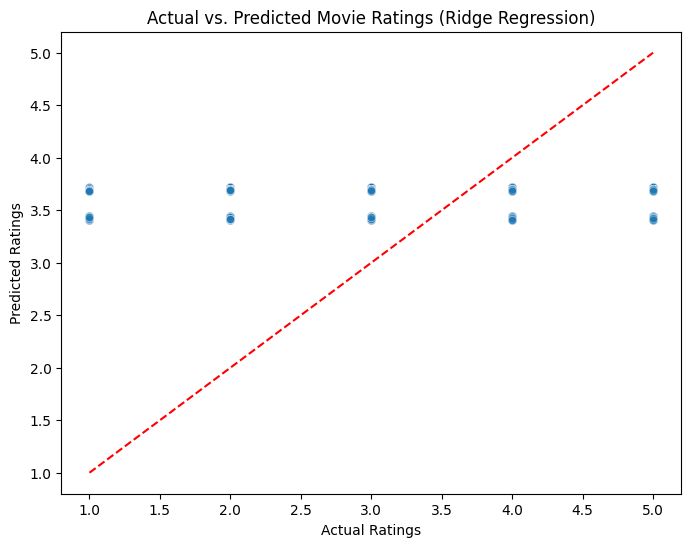

In [381]:
# scatter plot of predictions through ridge regression
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=predictions, alpha=0.4)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs. Predicted Movie Ratings (Ridge Regression)")
plt.plot([1, 5], [1, 5], '--', color='red')  # 1–5 scale reference
plt.show()


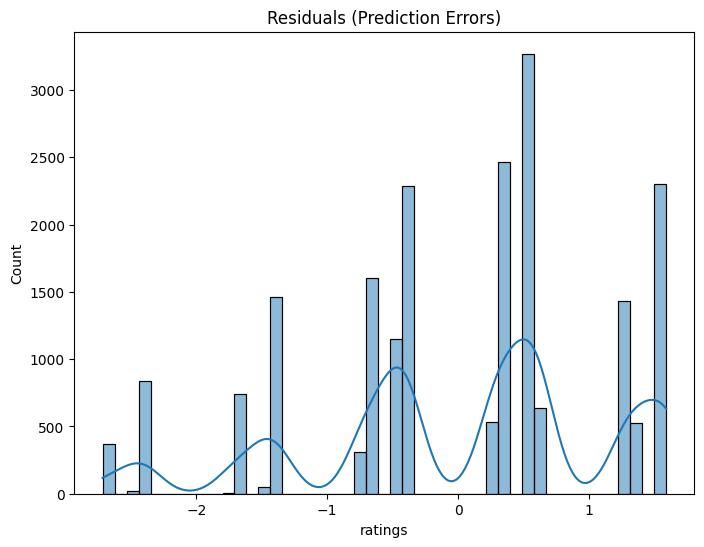

In [382]:
# Residual visualization to check for overfitting or underfitting
residuals = y_test - preds
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True)
plt.title("Residuals (Prediction Errors)")
plt.show()

In [383]:
# Collaborative filtering
from sklearn.neighbors import NearestNeighbors

pivot = data.pivot_table(index='user_id', columns='title', values='ratings').fillna(0)
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(pivot.T.values)  # Transpose to get item-item matrix

# Find similar movies to "Star Wars"
movie_index = list(pivot.columns).index("Star Wars (1977)")
distances, indices = model_knn.kneighbors([pivot.T.iloc[movie_index]], n_neighbors=6)


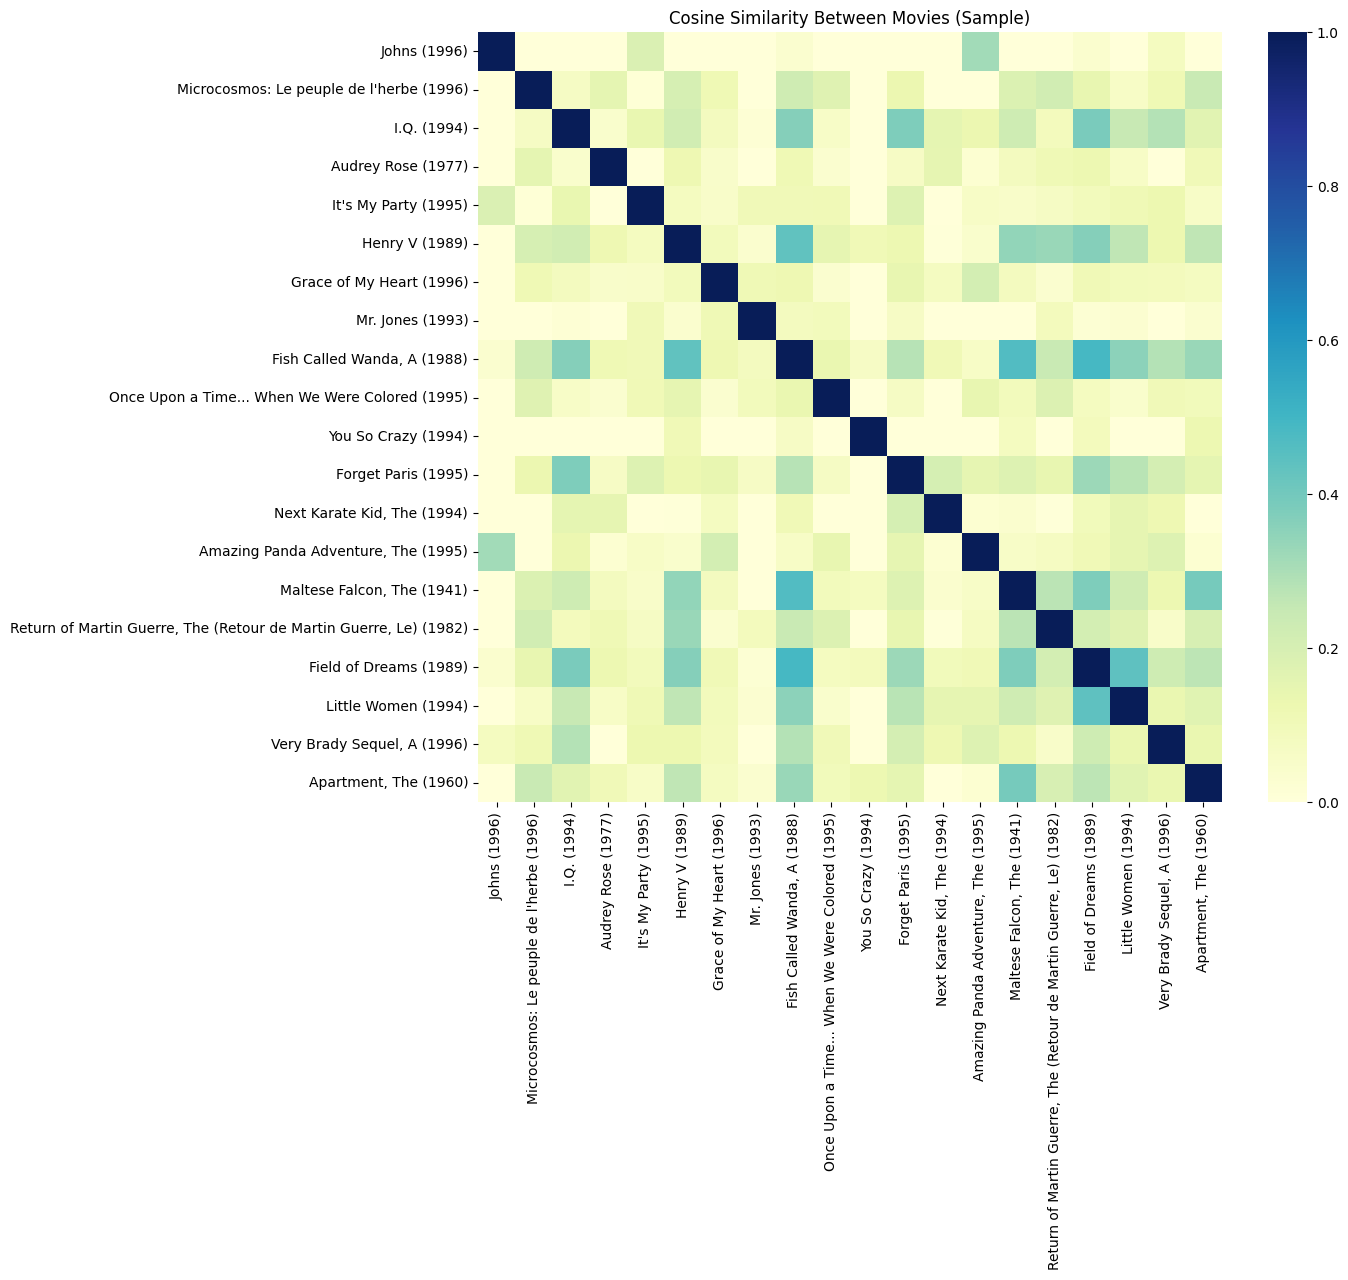

In [384]:
# Heatmap for movie similarity
import numpy as np
user_item_matrix_filled = user_item_matrix.fillna(0)
# Sample 20 movies
sample = user_item_matrix_filled.T.sample(20, axis=0)
sample_matrix = cosine_similarity(sample)

plt.figure(figsize=(12,10))
sns.heatmap(sample_matrix, xticklabels=sample.index, yticklabels=sample.index, cmap="YlGnBu", annot=False)
plt.title("Cosine Similarity Between Movies (Sample)")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


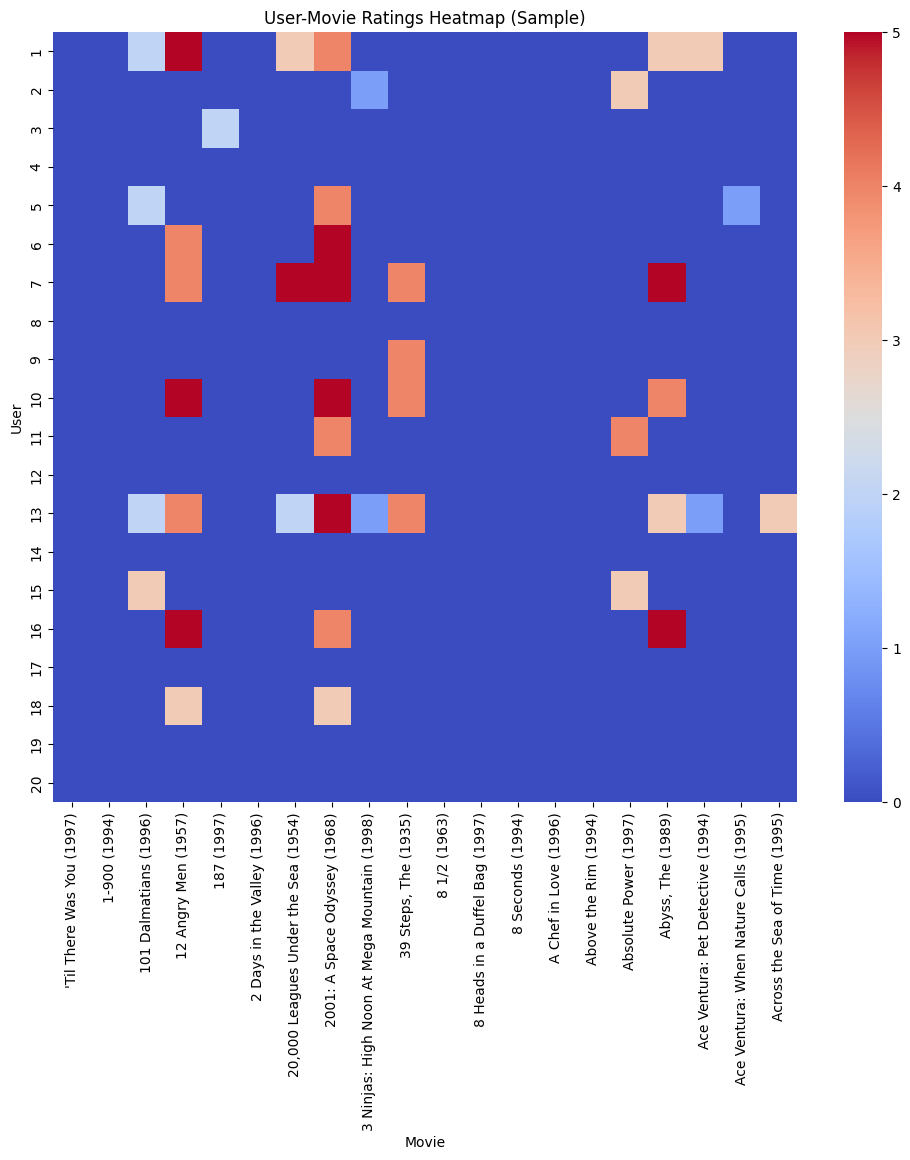

In [385]:
# Heatmap for user preferences
subset = user_item_matrix.iloc[:20, :20]

# Fill NaN values with 0 (if any exist)
subset = subset.fillna(0)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(subset, cmap="coolwarm", cbar=True)
plt.title("User-Movie Ratings Heatmap (Sample)")
plt.xlabel("Movie")
plt.ylabel("User")
plt.show()